In [125]:
%matplotlib inline

In [126]:
from __future__ import division

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vtk_rw import read_vtk, write_vtk
import nibabel as nb

In [128]:
rh_tsnr_min_file='/scr/ilz3/myelinconnect/new_groupavg/snr/tsnr/rh_tsnr_min.npy'
rh_snr_min_file='/scr/ilz3/myelinconnect/new_groupavg/snr/inv2prob/rh_inv2prob_min.npy'
rh_mesh_file='/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/rh_lowres_new.vtk'
rh_mask_file = '/scr/ilz3/myelinconnect/new_groupavg/masks/rh_medial_wall_new.npy'
rh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/rh_sulc.npy'


lh_tsnr_min_file='/scr/ilz3/myelinconnect/new_groupavg/snr/tsnr/lh_tsnr_min.npy'
lh_snr_min_file='/scr/ilz3/myelinconnect/new_groupavg/snr/inv2prob/lh_inv2prob_min.npy'
lh_mesh_file='/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/lh_lowres_new.vtk'
lh_mask_file = '/scr/ilz3/myelinconnect/new_groupavg/masks/lh_medial_wall_new.npy'
lh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/lh_sulc.npy'

In [129]:
rh_tsnr_min=np.load(rh_tsnr_min_file)
rh_snr_min=np.load(rh_snr_min_file)
rh_mask = np.load(rh_mask_file)
rh_sulc = np.load(rh_sulc_file)
rv, rf, rd = read_vtk(rh_mesh_file)

In [130]:
lh_tsnr_min=np.load(lh_tsnr_min_file)
lh_snr_min=np.load(lh_snr_min_file)
lh_mask = np.load(lh_mask_file)
lh_sulc = np.load(lh_sulc_file)
lv, lf, ld = read_vtk(lh_mesh_file)

In [131]:
rh_mask=np.asarray(rh_mask, dtype='int64')
lh_mask=np.asarray(lh_mask, dtype='int64')

In [132]:
from plotting import plot_surf_stat_map, crop_img
sns.set_context('notebook', font_scale=1.5)

### tsnr mask

In [133]:
rh_tsnr_masked = np.delete(rh_tsnr_min,rh_mask)
lh_tsnr_masked = np.delete(lh_tsnr_min,lh_mask)

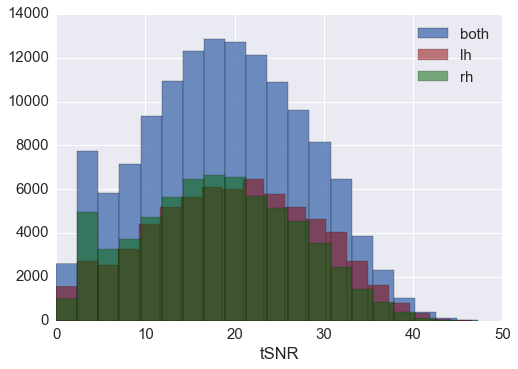

In [134]:
sns.set_style('darkgrid')
plt.hist(np.concatenate((lh_tsnr_masked, rh_tsnr_masked)), label='both', alpha=0.8, bins=20)
plt.hist(lh_tsnr_masked, label='lh', color='darkred', alpha=0.5, bins=20)
plt.hist(rh_tsnr_masked, label='rh', color='darkgreen', alpha=0.5, bins=20)
plt.legend()
plt.xlabel('tSNR')

In [135]:
std_tsnr = np.std(np.concatenate((lh_tsnr_masked, rh_tsnr_masked)))
mean_tsnr = np.mean(np.concatenate((lh_tsnr_masked, rh_tsnr_masked)))

In [136]:
print std_tsnr
print mean_tsnr
print mean_tsnr-std_tsnr
print mean_tsnr-1.5*std_tsnr
print mean_tsnr-2*std_tsnr

9.0814446325
18.8268724089
9.74542777641
5.20470546016
0.663983143905


In [137]:
rh_tsnr_min[rh_mask]=0
lh_tsnr_min[lh_mask]=0

#### 1 SDV

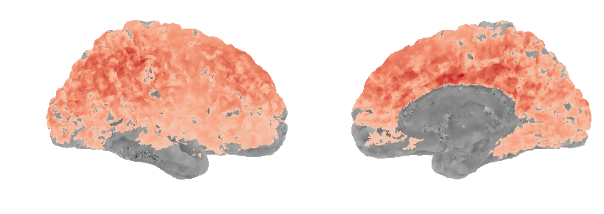

In [18]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, bg_map=rh_sulc, #bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10) ,threshold=mean_tsnr-std_tsnr)

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, bg_map=rh_sulc, #bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10), threshold=mean_tsnr-std_tsnr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

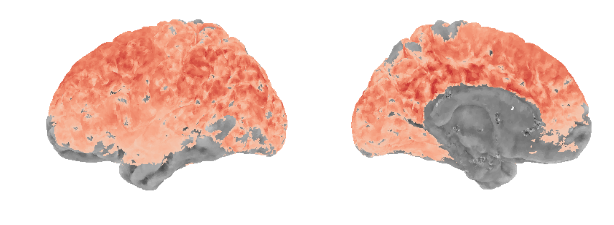

In [19]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, bg_map=lh_sulc, #bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9) ,threshold=mean_tsnr-std_tsnr)

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, bg_map=lh_sulc, #bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), threshold=mean_tsnr-std_tsnr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

#### 2 SDV

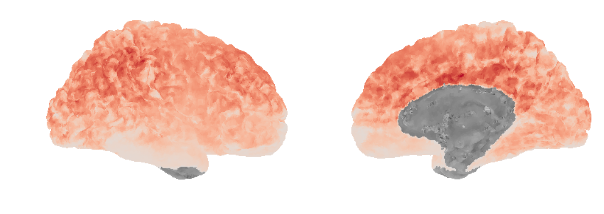

In [20]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, bg_map=rh_sulc, #bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10) ,threshold=mean_tsnr-2*std_tsnr)

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, bg_map=rh_sulc, #bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10), threshold=mean_tsnr-2*std_tsnr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

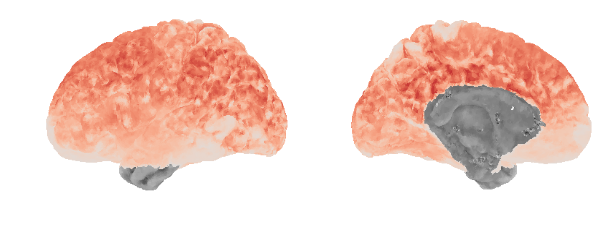

In [21]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, bg_map=lh_sulc, #bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9) ,threshold=mean_tsnr-2*std_tsnr)

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, bg_map=lh_sulc, #bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), threshold=mean_tsnr-2*std_tsnr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

#### 1.5 SDV

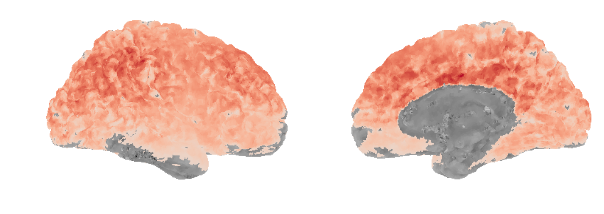

In [22]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, bg_map=rh_sulc, #bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10) ,threshold=mean_tsnr-1.5*std_tsnr)

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_tsnr_min, bg_map=rh_sulc, #bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10), threshold=mean_tsnr-1.5*std_tsnr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

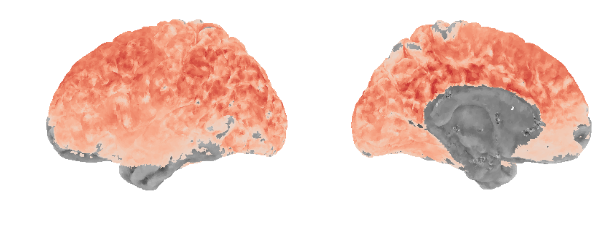

In [23]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, bg_map=lh_sulc, #bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9) ,threshold=mean_tsnr-1.5*std_tsnr)

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_tsnr_min, bg_map=lh_sulc, #bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), threshold=mean_tsnr-1.5*std_tsnr)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

### INV2 prob mask

In [138]:
rh_snr_masked = np.delete(rh_snr_min,rh_mask)
lh_snr_masked = np.delete(lh_snr_min,lh_mask)

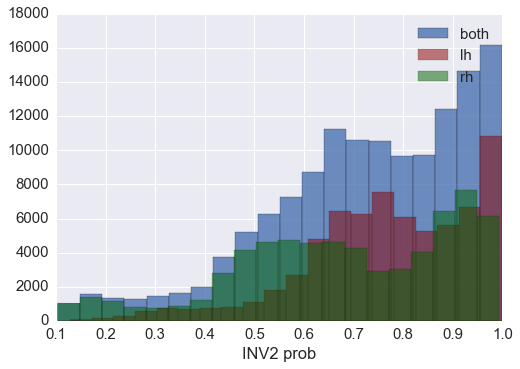

In [139]:
sns.set_style('darkgrid')
plt.hist(np.concatenate((lh_snr_masked, rh_snr_masked)), label='both', alpha=0.8, bins=20)
plt.hist(lh_snr_masked, label='lh', color='darkred', alpha=0.5, bins=20)
plt.hist(rh_snr_masked, label='rh', color='darkgreen', alpha=0.5, bins=20)
plt.legend()
plt.xlabel('INV2 prob')

In [140]:
std_snr = np.std(np.concatenate((lh_snr_masked, rh_snr_masked)))
mean_snr = np.mean(np.concatenate((lh_snr_masked, rh_snr_masked)))

In [141]:
print std_snr
print mean_snr
print mean_snr-std_snr
print mean_snr-1.5*std_snr
print mean_snr-2*std_snr

0.200813557085
0.726198597827
0.525385040742
0.424978262199
0.324571483656


In [142]:
std_snr_rh = np.std(rh_snr_masked)
mean_snr_rh = np.mean(rh_snr_masked)
print mean_snr_rh - 1*std_snr_rh
print mean_snr_rh - 1.5*std_snr_rh
print mean_snr_rh - 2*std_snr_rh

0.46001612286
0.349649209508
0.239282296156


In [143]:
std_snr_lh = np.std(lh_snr_masked)
mean_snr_lh = np.mean(lh_snr_masked)
print mean_snr_lh - 1*std_snr_lh
print mean_snr_lh - 1.5*std_snr_lh
print mean_snr_lh - 2*std_snr_lh

0.60239687502
0.518417093495
0.43443731197


In [144]:
rh_snr_min[rh_mask]=0
lh_snr_min[lh_mask]=0

#### 1 SDV

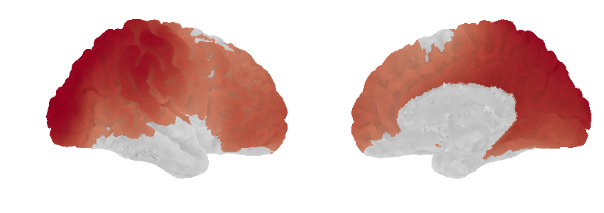

In [31]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10) ,threshold=mean_snr_rh-1*std_snr_rh)

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10), threshold=mean_snr_rh-1*std_snr_rh)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

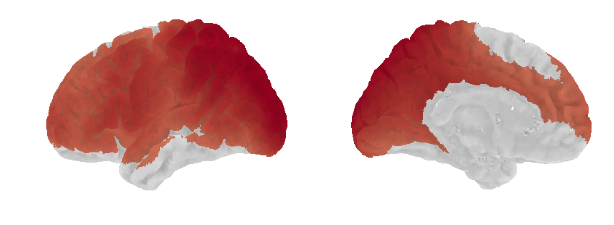

In [32]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9) ,threshold=mean_snr_lh-1*std_snr_lh)

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), threshold=mean_snr_lh-1*std_snr_lh)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

#### 2 SDV

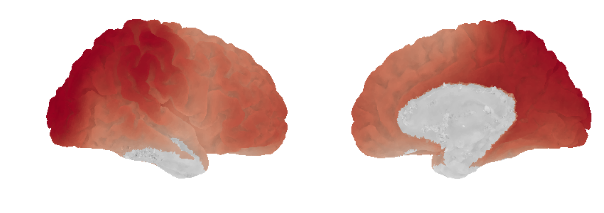

In [33]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10) ,threshold=mean_snr_rh-2*std_snr_rh)

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10), threshold=mean_snr_rh-2*std_snr_rh)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

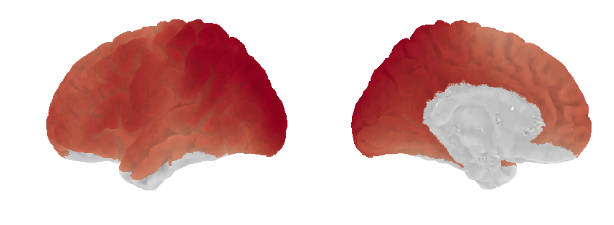

In [34]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9) ,threshold=mean_snr_lh-2*std_snr_lh)

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), threshold=mean_snr_lh-2*std_snr_lh)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

#### 1.5 SDV

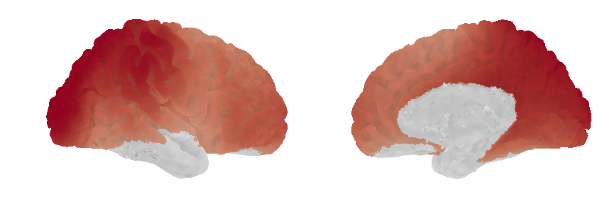

In [35]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10) ,threshold=mean_snr_rh-1.5*std_snr_rh)

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_snr_min, bg_map=rh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10), threshold=mean_snr_rh-1.5*std_snr_rh)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

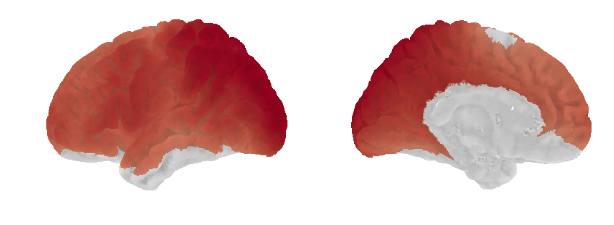

In [36]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9) ,threshold=mean_snr_lh-1.5*std_snr_lh)

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_snr_min, bg_map=lh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9), threshold=mean_snr_lh-1.5*std_snr_lh)
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

### combined mask

In [145]:
rh_mask = np.unique(np.concatenate((np.where(rh_tsnr_min<=mean_tsnr-1.5*std_tsnr)[0],
                                    np.where(rh_snr_min<=mean_snr_rh-1.5*std_snr_rh)[0])))

In [146]:
lh_mask = np.unique(np.concatenate((np.where(lh_tsnr_min<=mean_tsnr-1.5*std_tsnr)[0],
                                    np.where(lh_snr_min<=mean_snr_lh-1.5*std_snr_lh)[0])))

In [147]:
rh_mask_plot = np.zeros_like(rh_snr_min)
rh_mask_plot[rh_mask] = 1

In [148]:
lh_mask_plot = np.zeros_like(lh_snr_min)
lh_mask_plot[lh_mask] = 1

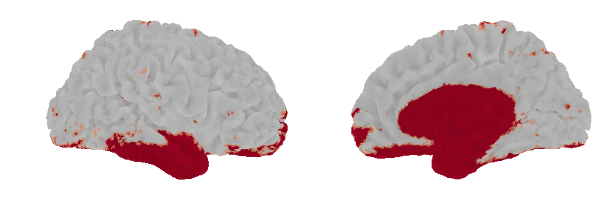

In [25]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=rh_mask_plot, bg_map=rh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10))

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=rh_mask_plot, bg_map=rh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10))
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

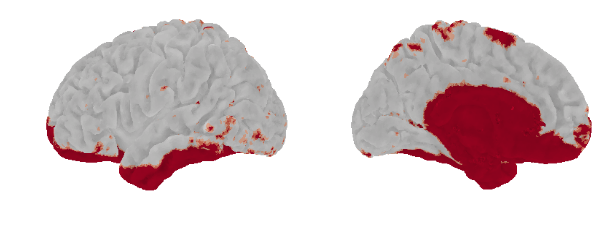

In [26]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=lh_mask_plot, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9))

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=lh_mask_plot, bg_map=lh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9))
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

### combine masks for left and right

# clean masks for visualization

In [28]:
import networkx as nx
from graphs import graph_from_mesh

In [62]:
gr = graph_from_mesh(rv, rf)
subr=nx.subgraph(gr, rh_mask)
largest_right = list(max(nx.connected_components(subr), key=len))

In [63]:
largest_right_plot = np.zeros_like(rh_mask_plot)
largest_right_plot[largest_right] = 1

In [59]:
gl = graph_from_mesh(lv, lf)
subl=nx.subgraph(gl, lh_mask)
largest_left = list(max(nx.connected_components(subl), key=len))

In [60]:
largest_left_plot = np.zeros_like(lh_mask_plot)
largest_left_plot[largest_left] = 1

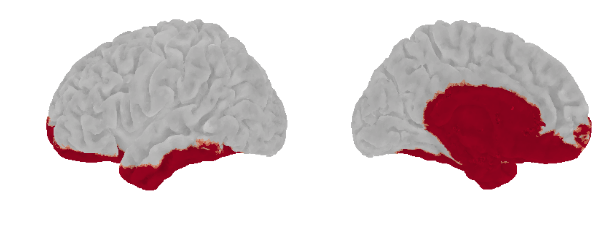

In [61]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=largest_left_plot, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9))

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=largest_left_plot, bg_map=lh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9))
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

In [73]:
write_vtk('/scr/ilz3/myelinconnect/new_groupavg/masks/lh_vizmask.vtk', lv, lf, 
          data=largest_left_plot[:,np.newaxis])

In [72]:
write_vtk('/scr/ilz3/myelinconnect/new_groupavg/masks/rh_vizmask.vtk', rv, rf, 
          data=largest_right_plot[:,np.newaxis])

In [149]:
_,_, smoothr = read_vtk('/scr/ilz3/myelinconnect/new_groupavg/masks/rh_vizmask_smoothdata.vtk')
smoothr = np.squeeze(smoothr)

In [93]:
_,_, smoothl = read_vtk('/scr/ilz3/myelinconnect/new_groupavg/masks/lh_vizmask_smoothdata.vtk')
smoothl = np.squeeze(smoothl)

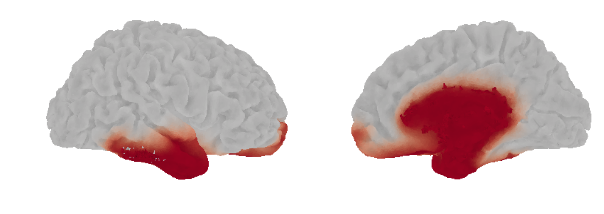

In [104]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=smoothr, bg_map=rh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10))

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=smoothr, bg_map=rh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10))
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

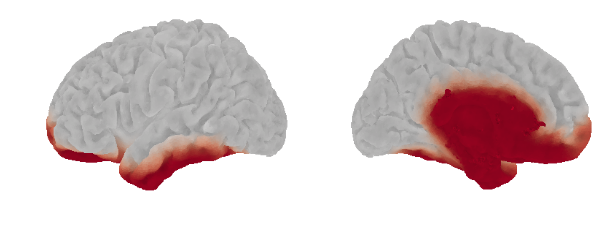

In [94]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=smoothl, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9))

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=smoothl, bg_map=lh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9))
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

In [156]:
smoothr_thr = np.copy(smoothr)
smoothr_thr[smoothr_thr<0.7]=0
smoothr_thr[smoothr_thr>0]=1

In [98]:
smoothl_thr = np.copy(smoothl)
smoothl_thr[smoothl_thr<0.8]=0
smoothl_thr[smoothl_thr>0]=1

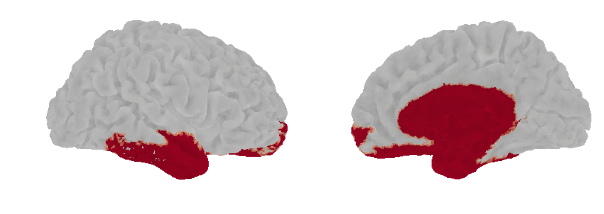

In [65]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=largest_right_plot, bg_map=rh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10))

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=largest_right_plot, bg_map=rh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10))
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

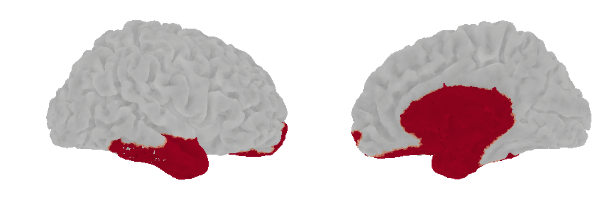

In [157]:
sns.set_style('white')
lat=plot_surf_stat_map(rv, rf, stat_map=smoothr_thr, bg_map=rh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=0, figsize=(11,10))

sns.set_style('white')
med=plot_surf_stat_map(rv, rf, stat_map=smoothr_thr, bg_map=rh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=180, figsize=(11,10))
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

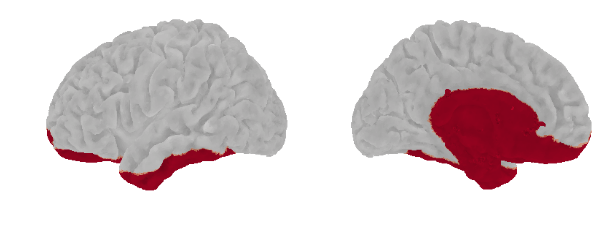

In [99]:
sns.set_style('white')
lat=plot_surf_stat_map(lv, lf, stat_map=smoothl_thr, bg_map=lh_sulc, bg_on_stat=True, darkness=0.5, 
                    elev=180,azim=180, figsize=(11,9))

sns.set_style('white')
med=plot_surf_stat_map(lv, lf, stat_map=smoothl_thr, bg_map=lh_sulc, bg_on_stat=True,darkness=0.5,
        elev=180,azim=0, figsize=(11,9))
    
        
lat_crop=crop_img(lat)
med_crop=crop_img(med)

fig=plt.figure()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(121)
plt.imshow(lat_crop)
ax1.set_axis_off()
ax2 = fig.add_subplot(122)
plt.imshow(med_crop)
ax2.set_axis_off()

#fig.savefig(fig_file % (method, hemi, str(e+1)))
#plt.close(fig)

In [158]:
write_vtk('/scr/ilz3/myelinconnect/new_groupavg/masks/lh_vizmask_clean.vtk', lv, lf, 
          data=smoothl_thr[:,np.newaxis])
write_vtk('/scr/ilz3/myelinconnect/new_groupavg/masks/rh_vizmask_clean.vtk', rv, rf, 
          data=smoothr_thr[:,np.newaxis])

In [159]:
lh_mask_clean = np.where(smoothl_thr > 0)[0]
rh_mask_clean = np.where(smoothr_thr > 0)[0]

In [160]:
np.save('/scr/ilz3/myelinconnect/new_groupavg/masks/lh_vizmask_clean.npy', lh_mask_clean)
np.save('/scr/ilz3/myelinconnect/new_groupavg/masks/rh_vizmask_clean.npy', rh_mask_clean)

In [161]:
left_right = np.concatenate((lh_mask_clean, rh_mask_clean+lv.shape[0]))
right_left = np.concatenate((rh_mask_clean, lh_mask_clean+rv.shape[0]))
np.save('/scr/ilz3/myelinconnect/new_groupavg/masks/fullmask_lh_rh_viz.npy', left_right)
np.save('/scr/ilz3/myelinconnect/new_groupavg/masks/fullmask_rh_lh_viz.npy', right_left)